<a href="https://colab.research.google.com/github/mch60131242/Home/blob/main/Data_Proprocessing%2C_standard_scale(z_score)%2C_broadcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
import numpy as np

In [9]:
fish_data = np.column_stack((fish_length, fish_weight)) ## 넘파이로 데이터를 만드는 방법
fish_target = np.concatenate((np.ones(35),np.zeros(14))) ## 넘파이에서는 0과 1을 만드는 것을 아예 함수로 지원

In [12]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state =42) #stratify를 통해서 샘플의 편향이 발생할수 있는 확률을 줄일 수 있다 stratify 매개변수에 타깃 데이터를 전달하면 비율에 맞게 데이터를 나누어준다


In [13]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)


1.0

In [14]:
kn.predict([[25,150]])

array([0.])

In [ ]:
distances, indexes = kn.kneighbors([[25, 150]])  ## distance(거리)와 index위치를 반환  n_neighbor =5 개가 기본이므로 5개를 반환

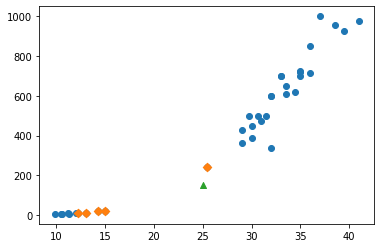

In [27]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0],train_input[:,1]) # train_input의 첫번째 컬럼(특성)(길이), train_input의 두번째 컬럼(특성)(무게) <<- 어레이 이기떄문에 저런식으로씀
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D') # 25,150과 가장가까운 5개를 보여주기 위함
plt.scatter(25,150, marker='^')
plt.show()

In [18]:
distances, indexes = kn.kneighbors([[25, 150]])  ## distance(거리)와 index위치를 반환  n_neighbor =5 개가 기본이므로 5개를 반환

In [22]:
train_target[indexes]

array([[1., 0., 0., 0., 0.]])

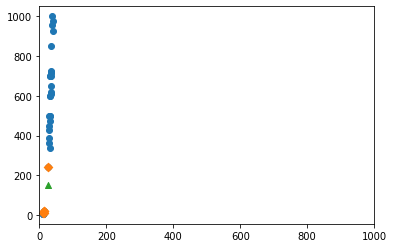

In [28]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0],train_input[:,1]) # train_input의 첫번째 컬럼(특성)(길이), train_input의 두번째 컬럼(특성)(무게) <<- 어레이 이기떄문에 저런식으로씀
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D') # 25,150과 가장가까운 5개를 보여주기 위함
plt.scatter(25,150, marker='^')
plt.xlim(0,1000)
plt.show()

In [ ]:
# 정규분포, 가우시안

In [48]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis=0)
train_scaled = (train_input - mean) / std#<<- broadcasting 기능

In [ ]:
print(train_scaled)

In [51]:
new = ([25, 150] - mean) / std


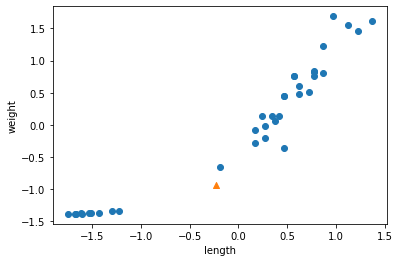

In [52]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [54]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std

In [55]:
kn.score(test_scaled, test_target)

1.0

In [56]:
print(kn.predict([new]))

[1.]


In [57]:
distances, indexes = kn.kneighbors([new])

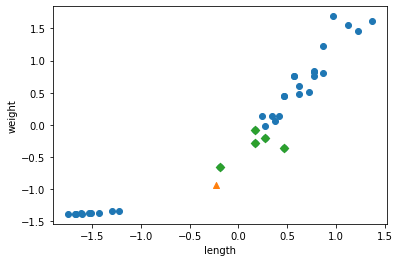

In [58]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()